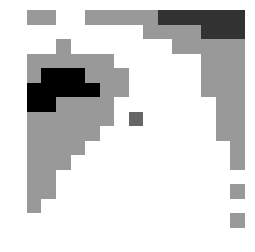

[0, 1, 0, 0, 0, 0, 0, 0]


In [4]:
from pathlib import Path
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
imageSet=[]
controllerSet=[]
cwd = Path().resolve()
def showImage(imageData):
	%matplotlib inline
	fig = plt.figure()
	plotwindow = fig.add_subplot(111)
	plt.axis('off')
	plt.imshow(imageData, interpolation='nearest',cmap='gray')
	plt.show()
def ParseFullData():  #tradition way
	global imageSet,controllerSet
	module_path = cwd 
	dataFileName = str(module_path) + "/testOct1611.txt"
	with open(dataFileName, "r") as f:
		x=0
		for line in f.readlines():
			line=line.strip()
			if x%2==0:
				imageSet.append(list(map(int,line.split(" "))))
			else:
				controllerSet.append(list(map(int,line.split(" "))))
			x+=1
	imageSet = np.array(imageSet)
	imageSet = imageSet.reshape(len(imageSet),15,15)
	showImage(imageSet[60])
	print(controllerSet[60])
ParseFullData()

In [5]:
import keras
from keras import layers
from keras import models
IMAGE_DIMS=[15,15,1]
class SmallerVGGNet:
	@staticmethod
	def build(width, height, depth):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = models.Sequential()
		# CONV => RELU => POOL
		model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, depth)))
		model.add(layers.MaxPooling2D((2, 2)))
		model.add(layers.Conv2D(64, (3, 3), activation='relu'))
		# model.summary()
		# softmax classifier
		model.add(layers.Flatten())
		model.add(layers.Dense(64, activation='relu'))
		model.add(layers.Dense(6, activation='softmax'))
		# return the constructed network architecture
		return model
model = SmallerVGGNet.build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],depth=IMAGE_DIMS[2])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 84,806
Trainable params: 84,806
Non-trainable params: 0
_________________________________________________________________


In [6]:
import numpy as np
import os
import sys
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
imageSet=[]
controllerSet=[]
cwd = Path().resolve()
def KerasPreprocessing():
	data = np.array(imageSet, dtype="float") / 255.0
	data = data.reshape(len(data), 15, 15)
	# print(len(controllerSet))
	# print(len(imageSet))
	labels = classifyController()
	labels = np.array(labels)
	# print(labels[10:20])
	# print(len(data),len(labels))
	print(data.shape, "    ",labels.shape )
	lb = LabelBinarizer()
	labels = lb.fit_transform(labels)
	print(len(labels),labels[0])
	(train_images, test_images, train_labels, test_labels) = train_test_split(data,labels, test_size=0.2, random_state=42)
	print(len(train_images),len(test_images),len(train_labels),len(test_labels))
	train_images = np.expand_dims(train_images, axis=3)
	print(train_images.shape)
	test_images = np.expand_dims(test_images, axis=3)
	# print(train_images[0]) #image 
	# print(test_images[0]) #lable
	model = models.Sequential()
	# CONV => RELU => POOL
	model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Conv2D(64, (3, 3), activation='relu'))
	# model.summary()
	# softmax classifier
	model.add(layers.Flatten())
	model.add(layers.Dense(64, activation='relu'))
	model.add(layers.Dense(6, activation='softmax'))
	model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
	model.fit(train_images, train_labels, epochs=5, batch_size=64)
	test_loss, test_acc = model.evaluate(test_images, test_labels)
	print(test_acc)
def classifyController():
	labels=[]
	for controller in controllerSet:
		if controller[1]==1:
			if controller[6]==1:
				labels.append("LB")
			elif controller[7]==1:
				labels.append("RB")
			else:
				labels.append("B")
		elif controller[6]==1:
			labels.append("L")
		elif controller[7]==1:
			labels.append("R")
		else:
			labels.append("")
	return labels
def ParseFullData(FileName):  #tradition way
	global imageSet,controllerSet
	module_path = cwd 
	dataFileName = str(module_path) + FileName 
	with open(dataFileName, "r") as f:
		x=0
		for line in f.readlines():
			line=line.strip()
			if x%2==0:
				imageSet.append(list(map(int,line.split(" "))))
			else:
				controllerSet.append(list(map(int,line.split(" "))))
			x+=1
	classifyController()
	KerasPreprocessing()
ParseFullData("/testOct1611.txt")

(367, 15, 15)      (367,)
367 [1 0 0 0 0 0]
293 74 293 74
(293, 15, 15, 1)
Epoch 1/5
293/293 [==============================] - 7s 24ms/step - loss: 1.5082 - acc: 0.4164
Epoch 2/5
293/293 [==============================] - 0s 491us/step - loss: 1.3979 - acc: 0.5085
Epoch 3/5
293/293 [==============================] - 0s 386us/step - loss: 1.3270 - acc: 0.5392
Epoch 4/5
293/293 [==============================] - 0s 413us/step - loss: 1.3168 - acc: 0.5461
Epoch 5/5
74/74 [==============================] - 0s 2ms/step
0.5270270302488997


In [7]:
imageSet=[]
controllerSet=[]
def ParseFullData(FileName):  #tradition way
	global imageSet,controllerSet
	module_path = cwd 
	dataFileName = str(module_path) + FileName
	with open(dataFileName, "r") as f:
		x=0
		for line in f.readlines():
			line=line.strip()
			if x%2==0:
				imageSet.append(list(map(int,line.split(" "))))
			else:
				controllerSet.append(list(map(int,line.split(" "))))
			x+=1
	classifyController()
	KerasPreprocessing()
ParseFullData("/testOct2510.txt")

(1002, 15, 15)      (1002,)
1002 [1 0 0 0 0 0]
801 201 801 201
(801, 15, 15, 1)
Epoch 1/5
801/801 [==============================] - 1s 1ms/step - loss: 1.5513 - acc: 0.4357
Epoch 2/5
801/801 [==============================] - 0s 373us/step - loss: 1.4608 - acc: 0.4707
Epoch 3/5
801/801 [==============================] - 0s 356us/step - loss: 1.4083 - acc: 0.4744
Epoch 4/5
801/801 [==============================] - 0s 353us/step - loss: 1.3712 - acc: 0.4844
Epoch 5/5
201/201 [==============================] - 0s 866us/step
0.5174129357681939


In [8]:
imageSet=[]
controllerSet=[]
def ParseFullData(FileName):  #tradition way
	global imageSet,controllerSet
	module_path = cwd 
	dataFileName = str(module_path) + FileName
	with open(dataFileName, "r") as f:
		x=0
		for line in f.readlines():
			line=line.strip()
			if x%2==0:
				imageSet.append(list(map(int,line.split(" "))))
			else:
				controllerSet.append(list(map(int,line.split(" "))))
			x+=1
	KerasPreprocessing()
ParseFullData("/FullData.txt")

(1369, 15, 15)      (1369,)
1369 [1 0 0 0 0 0]
1095 274 1095 274
(1095, 15, 15, 1)
Epoch 1/5
1095/1095 [==============================] - 1s 989us/step - loss: 1.4786 - acc: 0.4740
Epoch 2/5
1095/1095 [==============================] - 0s 421us/step - loss: 1.3951 - acc: 0.5032
Epoch 3/5
1095/1095 [==============================] - 1s 459us/step - loss: 1.3303 - acc: 0.5041
Epoch 4/5
1095/1095 [==============================] - 0s 436us/step - loss: 1.2947 - acc: 0.5041
Epoch 5/5
274/274 [==============================] - 0s 704us/step
0.5000000013052112


In [9]:
imageSet=[]
controllerSet=[]
leftSet=[]
rightSet=[]
leftBoostSet=[]
rightBoostSet=[]
boostSet=[]
noneActionSet=[]
cwd = Path().resolve()
def KerasPreprocessingNew():
	data = np.array(imageSet, dtype="float") / 255.0
	data = data.reshape(len(data), 15, 15)
	# print(len(controllerSet))
	# print(len(imageSet))
	labels = classifyController()
	labels = np.array(labels)
	# print(labels[10:20])
	# print(len(data),len(labels))
	print(data.shape, "    ",labels.shape )
	lb = LabelBinarizer()
	labels = lb.fit_transform(labels)
	print(len(labels),labels[0])
	(train_images, test_images, train_labels, test_labels) = train_test_split(data,labels, test_size=0.2, random_state=42)
	print(len(train_images),len(test_images),len(train_labels),len(test_labels))
	train_images = np.expand_dims(train_images, axis=3)
	print(train_images.shape)
	test_images = np.expand_dims(test_images, axis=3)
	# print(train_images[0]) #image 
	# print(test_images[0]) #lable
	model = models.Sequential()
	# CONV => RELU => POOL
	model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Conv2D(64, (3, 3), activation='relu'))
	# model.summary()
	# softmax classifier
	model.add(layers.Flatten())
	model.add(layers.Dense(64, activation='relu'))
	model.add(layers.Dense(5, activation='softmax'))
	model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
	model.fit(train_images, train_labels, epochs=5, batch_size=64)
	test_loss, test_acc = model.evaluate(test_images, test_labels)
	print(test_acc)
    
def isNullAction(list):
	for i in list:
		if i != 0:
			return False
	return True

def classify(image,controller):  # Deprecated only for validate Data
	global leftSet,rightSet,leftBoostSet,rightBoostSet,boostSet
	if controller[1]==1:        #boost
		if controller[6]==1:
			leftBoostSet.append(image)
		elif controller[7]==1:
			rightBoostSet.append(image)
		else:
			boostSet.append(image)
	elif controller[6]==1:
		leftSet.append(image)
	elif controller[7]==1:
		rightSet.append(image)
	else:
		noneActionSet.append(image)

def optimiseData():
	global imageSet,controllerSet
	fast = 0
	slow = 0
	for fast in range(len(imageSet)):
		if(not isNullAction(controllerSet[fast])):
			imageSet[slow] = imageSet[fast]
			controllerSet[slow] = controllerSet[fast]
			slow+=1;
			fast+=1;
		else:
			fast+=1;
	imageSet = imageSet[0 : slow]
	controllerSet = controllerSet[0 : slow]
	for (x,y) in zip(imageSet,controllerSet):
		classify(x,y)
	# print(optimisedLabel)
	print("noneActionSet",len(noneActionSet))
	print("leftSet",len(leftSet))
	print("leftBoostSet",len(leftBoostSet))
	print("rightSet",len(rightSet))
	print("rightBoostSet",len(rightBoostSet))
	print("boostSet",len(boostSet))

def ParseFullData(FileName):  #tradition way
	global imageSet,controllerSet
	module_path = cwd 
	dataFileName = str(module_path) + FileName
	with open(dataFileName, "r") as f:
		x=0
		for line in f.readlines():
			line=line.strip()
			if x%2==0:
				imageSet.append(list(map(int,line.split(" "))))
			else:
				controllerSet.append(list(map(int,line.split(" "))))
			x+=1
	# for i in range(len(imageSet)):     	# find the Wrong Data
	# 	if len(imageSet[i]) != 225:
	# 		print(i,"   ",len(imageSet[i]))
	# print(len(imageSet))
	optimiseData()
	KerasPreprocessingNew()

ParseFullData("/FullData.txt")

noneActionSet 0
leftSet 125
leftBoostSet 180
rightSet 78
rightBoostSet 209
boostSet 658
(1250, 15, 15)      (1250,)
1250 [0 0 1 0 0]
1000 250 1000 250
(1000, 15, 15, 1)
Epoch 1/5
1000/1000 [==============================] - 1s 947us/step - loss: 1.3064 - acc: 0.5000
Epoch 2/5
1000/1000 [==============================] - 0s 463us/step - loss: 1.1956 - acc: 0.5410
Epoch 3/5
1000/1000 [==============================] - 0s 381us/step - loss: 1.1326 - acc: 0.5470
Epoch 4/5
1000/1000 [==============================] - 0s 381us/step - loss: 1.0619 - acc: 0.5660
Epoch 5/5
250/250 [==============================] - 0s 828us/step
0.5800000023841858
